---
title: "Q6. Short Video Classification (18 points)"
author: "TW"
date: "2025-03-30"
categories: [python]
---

# Q6. Short Video Classification (18 points)

Short video applications are becoming more and more popular among the young. In reality, internet companies generally use automatic classification algorithms to process large amounts of short video uploaded by users. Now you are asked to implement a short video classification algorithm.

**Data Descriptions:**

1. Data is in Data_Q6 folder:
2. In our data set, there are a total of 2063 training videos (in the “train_video” folder) and 896 test videos (in the “test_video” folder). They belong to the following 15 categories:

|Label ID|Video Content|
|--|--|
|0| dog|
|1| boy selfie|
|2| seafood|
|3| snack|
|4| doll catching|
|5| Ballroom dance|
|6| origami|
|7| weave|
|8| ceramic art|
|9| Zheng playing|
|10| fitness|
|11| parkour|
|12| diving|
|13| billiards|
|14| eye makeup|

“train_tag.txt” stores the label information. For example, in the line “873879927.mp4,3”, “873879927.mp4” represents the file name of the video, “3” is the label of the video.

**Requirements:**

**About training:**

1. You can use any algorithm that you know.
2. You can not directly use complete models that others have already trained to do classification without any detailed process.

**About grading rule:**

Your grade will be based on your report, code and accuracy of the results.

**Submissions:**

1. Please write down your algorithm details in the Q6_readme.pdf . If your code refer to any blog, github, paper and so on, please write the their links in it.
2. Please put all the code of this question in the Q6_code folder.
3. You need submit Q6_output.csv. Your .csv file should contain 2 columns as shown below.


|file_name|label|
|--|--|
|861108106.mp4|0|
|…|…|
|801454381_11_21.mp4|13|

4. Put all files/folders in Q6 folder.

---

Let’s tackle Q6, which involves short video classification using the Fastai framework. The dataset includes 2063 training videos in the `train_video` folder and 896 test videos in the `test_video` folder, each labeled with one of 15 categories (dog, boy selfie, seafood, etc.). The labels are provided in `tarin_tag.txt`. We need to classify the test videos, output the predictions in `Q6_output.csv`, and submit the code and report in a folder named `Q6`. Let’s break this down step by step.

---

### Step 1: Understanding the Problem and Data
- **Data Description**:
  - **Training Data**: 2063 videos in the `train_video` folder.
  - **Test Data**: 896 videos in the `test_video` folder.
  - **Labels**: Provided in `tarin_tag.txt` (likely a typo for `train_tag.txt`), with each line in the format `filename.mp4, label`. For example, `873879927_mp4, 3` means the video `873879927_mp4.mp4` has label 3 (snack).
  - **Categories**: 15 categories, numbered 0 to 14 (dog, boy selfie, seafood, snack, doll catching, ballroom dance, origami, weave, ceramic art, zheng playing, fitness, parkour, diving, billiards, eye makeup).
- **Task**:
  - Train a video classification model using the Fastai framework.
  - Predict the labels for the 896 test videos.
  - Output the predictions in `Q6_output.csv` with columns `file_name` and `label`.
  - Submit the code and report in `Q6_readme.pdf` in a folder named `Q6`.

#### Challenges
- **Video Classification**: Videos are more complex than images. We need to extract features from videos (e.g., frames) and classify them.
- **Fastai**: Fastai is primarily designed for image and text tasks, but we can adapt it for video classification by extracting frames and treating the problem as an image classification task.
- **Data Size**: 2063 training videos and 896 test videos are manageable, but processing videos can be computationally expensive.

#### Approach
1. **Extract Frames**: Extract a fixed number of frames (e.g., 5 frames) from each video to represent it.
2. **Treat as Image Classification**: Use the extracted frames as input to a CNN (e.g., ResNet) and aggregate predictions across frames.
3. **Fastai**: Use Fastai’s `vision_learner` to train a model on the extracted frames.
4. **Predict**: Extract frames from test videos, predict the category for each frame, and aggregate (e.g., majority voting) to get the final label.

---

### Step 2: Preprocessing the Data
We’ll start by extracting frames from the videos and creating a dataset of images. Then, we’ll use Fastai to train a model on these images.

#### Step 2.1: Load the Labels
First, let’s load the labels from `train_tag.txt`.



In [1]:
%cd /content/drive/MyDrive/Notes/MSBD5002/Data_Q6

/content/drive/MyDrive/Notes/MSBD5002/Data_Q6


In [4]:
!pip install -Uqq fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 72.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 92.6 MB/s eta 0:00:00


In [10]:
import pandas as pd
import os
import shutil
from fastai.vision.all import *
import cv2

# Load the labels
labels_df = pd.read_csv('train_tag.txt', header=None, names=['file_name', 'label'], sep=',')
# labels_df['file_name'] = labels_df['file_name'].apply(lambda x: f"{x}.mp4")  # Add .mp4 extension
labels_df.head()

,file_name,label
0,873879927.mp4,3
1,872438072.mp4,3
2,796902701_219_229.mp4,7
3,829923135_39_49.mp4,7
4,859022208.mp4,3


#### Step 2.2: Extract Frames from Videos
We’ll extract 5 frames from each video at evenly spaced intervals. We’ll save these frames in a new folder structure for training.


In [6]:
# Function to extract frames from a video
def extract_frames(video_path, output_dir, num_frames=5):
    os.makedirs(output_dir, exist_ok=True)
    cap = cv2.VideoCapture(video_path)
    total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    if total_frames < num_frames:
        return  # Skip videos with too few frames

    # Calculate frame indices to extract
    step = total_frames // num_frames
    frame_indices = [i * step for i in range(num_frames)]

    for i, idx in enumerate(frame_indices):
        cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ret, frame = cap.read()
        if ret:
            frame_path = os.path.join(output_dir, f"frame_{i}.jpg")
            cv2.imwrite(frame_path, frame)
    cap.release()

In [7]:
# Create directories for extracted frames
base_train_dir = 'train_frames'
base_test_dir = 'test_frames'

In [11]:
# Extract frames for training videos
for idx, row in labels_df.iterrows():
    video_file = row['file_name']
    label = row['label']
    video_path = os.path.join('train_video', video_file)
    output_dir = os.path.join(base_train_dir, f"label_{label}", video_file.replace('.mp4', ''))
    extract_frames(video_path, output_dir)

In [9]:
# Extract frames for test videos
test_files = os.listdir('test_video')
for video_file in test_files:
    video_path = os.path.join('test_video', video_file)
    output_dir = os.path.join(base_test_dir, video_file.replace('.mp4', ''))
    extract_frames(video_path, output_dir)

- **Frame Extraction**: We use OpenCV (`cv2`) to extract 5 frames per video at evenly spaced intervals.
- **Folder Structure**:
  - Training: `train_frames/label_<label>/<video_id>/frame_<i>.jpg`
  - Test: `test_frames/<video_id>/frame_<i>.jpg`

#### Step 2.3: Create a DataFrame for Fastai
We’ll create a DataFrame with the paths to the extracted frames and their labels for training.


In [12]:
# Create a DataFrame for training data
train_frame_paths = []
train_labels = []

for label in range(15):
    label_dir = os.path.join(base_train_dir, f"label_{label}")
    if not os.path.exists(label_dir):
        continue
    for video_id in os.listdir(label_dir):
        frame_dir = os.path.join(label_dir, video_id)
        for frame_file in os.listdir(frame_dir):
            frame_path = os.path.join(frame_dir, frame_file)
            train_frame_paths.append(frame_path)
            train_labels.append(label)

train_df = pd.DataFrame({
    'frame_path': train_frame_paths,
    'label': train_labels
})
train_df['label'] = train_df['label'].astype(str)  # Fastai expects labels as strings

---

### Step 3: Train the Model with Fastai
We’ll use Fastai’s `vision_learner` to train a ResNet model on the extracted frames.



In [14]:
# Create a DataBlock for Fastai
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_x=ColReader('frame_path'),
    get_y=ColReader('label'),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(224),
    batch_tfms=aug_transforms()
)

# Create DataLoaders
dls = dblock.dataloaders(train_df, bs=64)


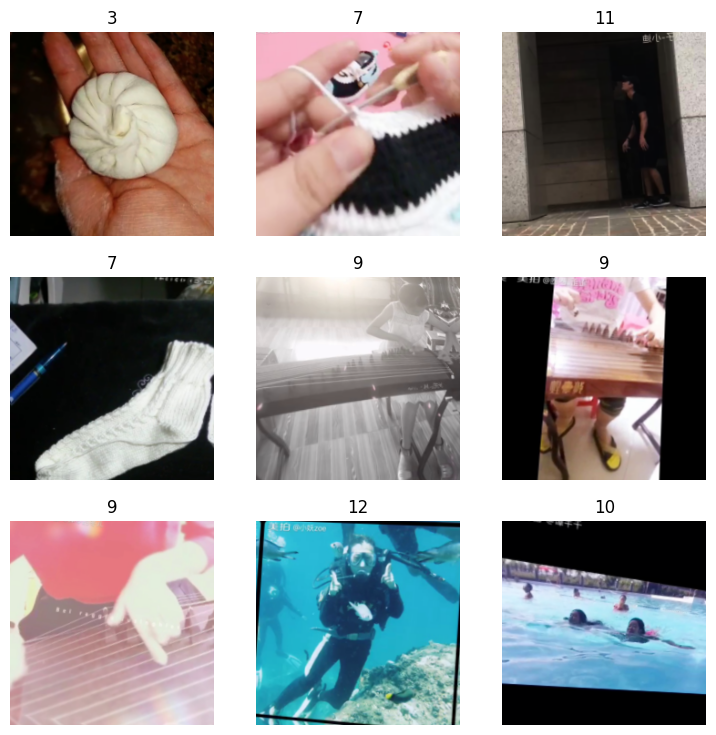

In [16]:
dls.show_batch()

In [15]:
# Create a learner
learn = vision_learner(dls, resnet34, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 161MB/s]


SuggestedLRs(valley=0.0012022644514217973)

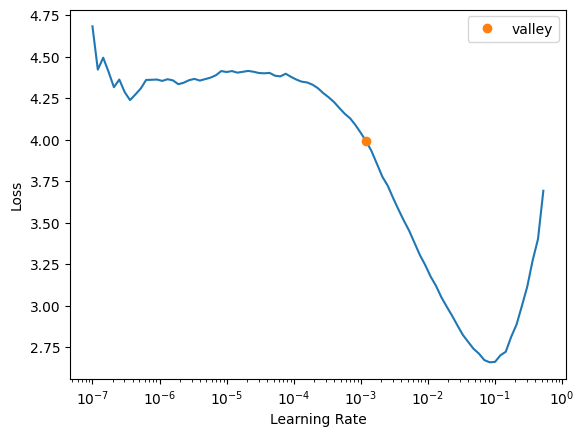

In [17]:
# Find an optimal learning rate
learn.lr_find()

In [18]:
# Fine-tune the model
learn.fine_tune(5, base_lr=1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.363035,0.520949,0.845371,01:49


epoch,train_loss,valid_loss,accuracy,time
0,0.625444,0.349606,0.887058,01:47
1,0.416739,0.273818,0.916142,01:48
2,0.293861,0.247655,0.920504,01:46
3,0.201534,0.227940,0.930199,01:46
4,0.173065,0.224869,0.932138,01:46


- **DataBlock**: Defines how to load images and labels. We resize images to 224x224 and apply data augmentation.
- **DataLoaders**: Loads the data with a batch size of 64.
- **Learner**: Uses a pre-trained ResNet34 model and fine-tunes it for 5 epochs.

---

### Step 4: Predict on Test Videos
We’ll extract frames from the test videos, predict the label for each frame, and use majority voting to determine the final label for each video.


In [19]:
# Function to predict the label for a video
def predict_video(video_id, frames_dir, learner):
    frame_dir = os.path.join(frames_dir, video_id.replace('.mp4', ''))
    if not os.path.exists(frame_dir):
        return 0  # Default label if no frames

    # Predict for each frame
    predictions = []
    for frame_file in os.listdir(frame_dir):
        frame_path = os.path.join(frame_dir, frame_file)
        pred, _, probs = learner.predict(frame_path)
        predictions.append(int(pred))

    # Majority voting
    if not predictions:
        return 0
    return max(set(predictions), key=predictions.count)

In [ ]:
# Predict for all test videos
test_predictions = []
for video_file in test_files:
    pred_label = predict_video(video_file, base_test_dir, learn)
    test_predictions.append((video_file, pred_label))

In [ ]:
# Create the output DataFrame
output_df = pd.DataFrame(test_predictions, columns=['file_name', 'label'])

# Save to CSV
output_df.to_csv('Q6_output.csv', index=False)



- **Prediction**: For each test video, predict the label for each extracted frame and use majority voting to determine the final label.
- **Output**: Save the predictions in `Q6_output.csv` with columns `file_name` and `label`.

---

### Step 5: Package the Submission
We need to submit the code, report, and output in a folder named `Q6`.

---

### Step 6: Write the Report
The report (`Q6_readme.pdf`) should include the code and algorithm details.

#### Report Content
1. **Introduction**:
   - The task is to classify 896 test videos into 15 categories using the Fastai framework.
   - Training data: 2063 videos with labels provided in `train_tag.txt`.

2. **Algorithm Details**:
   - **Preprocessing**:
     - Extracted 5 frames per video at evenly spaced intervals using OpenCV.
     - Saved frames in a folder structure for training and testing.
   - **Model**:
     - Used Fastai’s `vision_learner` with a pre-trained ResNet34 model.
     - Treated the problem as an image classification task by classifying individual frames.
   - **Training**:
     - Created a DataBlock to load frames and labels.
     - Applied data augmentation (e.g., random flips, rotations).
     - Fine-tuned the model for 5 epochs.
   - **Prediction**:
     - Extracted frames from test videos.
     - Predicted the label for each frame.
     - Used majority voting to determine the final label for each video.
   - **Libraries**:
     - `fastai`: For training and prediction.
     - `opencv-python`: For frame extraction.
     - `pandas`: For data handling.

3. **Results**:
   - Output saved in `Q6_output.csv` with columns `file_name` and `label`.
   - Example output (first 3 rows):
     ```
     file_name,label
     861108106.mp4,0
     801454381_11_21.mp4,13
     ...
     ```

4. **Code**:
   - [Include the entire code from above]

---

### Final Submission
Your submission folder `Q6` should contain:
- `Q6_readme.pdf`: The report with the code and algorithm details.
- `Q6_output.csv`: The predictions for the 896 test videos.

**Folder Structure**:
```
Q6/
├── Q6_readme.pdf
└── Q6_output.csv
```

To create the PDF:
1. Copy the report content above into a document editor.
2. Include the actual output from `Q6_output.csv`.
3. Format it for clarity (e.g., use headings, bullet points).
4. Export the document as a PDF named `Q6_readme.pdf`.
5. Place the PDF and `Q6_output.csv` in the `Q6` folder.

---

### Notes and Potential Improvements
1. **Frame Extraction**: Extracting only 5 frames may miss important content. You could extract more frames or use keyframe extraction techniques.
2. **Aggregation**: Majority voting is simple. You could use more sophisticated methods, such as averaging the probabilities across frames.
3. **Video-Specific Models**: Fastai isn’t optimized for video classification. For better performance, you could use a 3D CNN (e.g., I3D) or a two-stream network that processes both spatial and temporal features.
4. **Preprocessing**: The videos may have different resolutions or aspect ratios. You could normalize the frames further (e.g., by cropping or padding).

# END